In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pygenstability as pgs

from mcf import MCF, SBM

In [3]:
plt.rcParams.update({'font.size': 15})

# 1) MCF cartoon: Hierarchical

100%|██████████| 7/7 [00:00<00:00, 3257.17it/s]

Average persistent hierarchy: 1.0


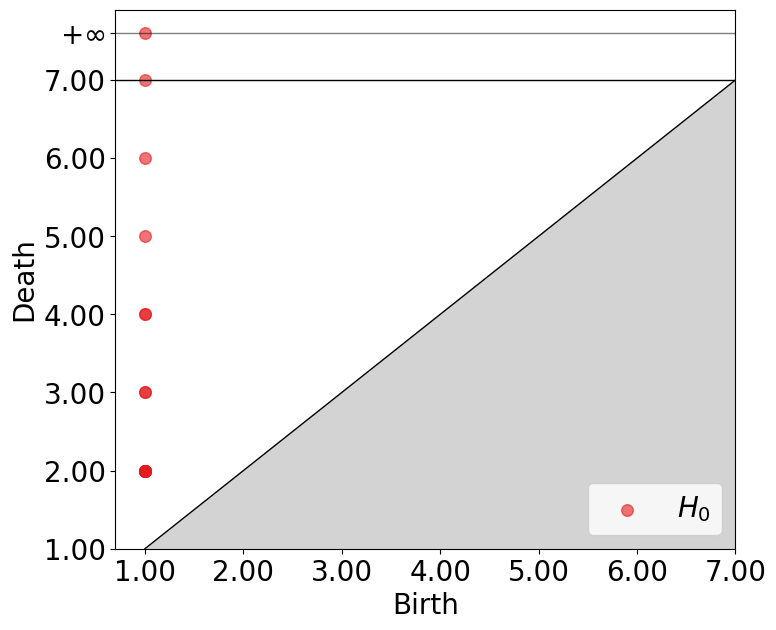

In [8]:
# define sequence of partitions
partitions_hmsbmb = [np.array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
np.array([0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7]),
np.array([0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5]),
np.array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3]),
np.array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2]),
np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]),
np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])]

# initialise MCF object for single sequence of partitions
mcf = MCF()
mcf.load_data(partitions_hmsbmb)

# plot Sankey
fig = mcf.plot_sankey(step=1,pad=4,color=False,thickness=4)
fig.write_image("figures/cartoon/cartoon_sankey_h.svg")

# build filtration and compute PH for single sequence of partitions
mcf.build_filtration()
mcf.compute_persistence()

# compute persistent hierarchy
h, h_bar = mcf.compute_persistent_hierarchy()
print("Average persistent hierarchy:",round(h_bar,4))

# plot persistence diagram
ax = mcf.plot_pd(marker_size=70,alpha=0.6)
plt.savefig("figures/cartoon/cartoon_PD_h.pdf", bbox_inches='tight')



# 2) MCF cartoon: Non-hiearchical

100%|██████████| 7/7 [00:00<00:00, 2816.86it/s]

Average persistent hierarchy: 0.875


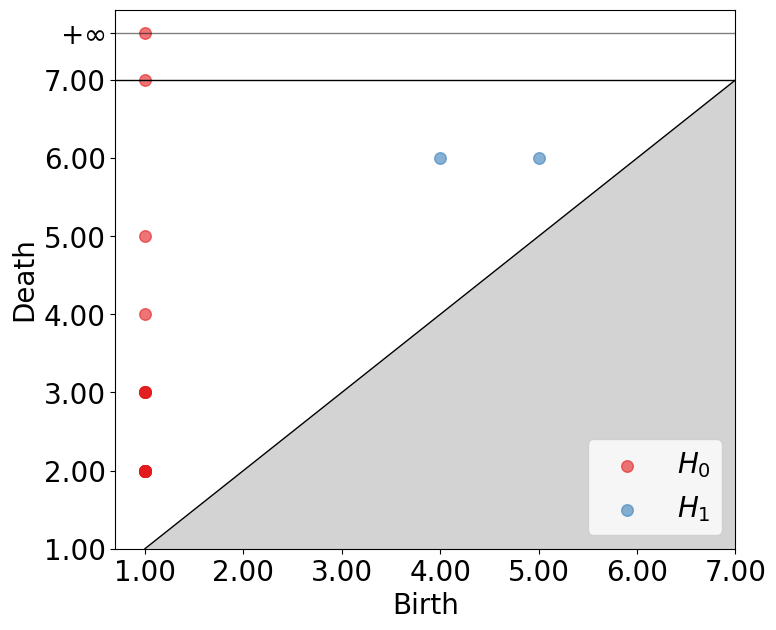

In [9]:
# define sequence of partitions
partitions_nhmsbmb = [np.array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
np.array([0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7]),
np.array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3]),
np.array([1, 1, 0, 0, 0,0, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3]),
np.array([1, 1, 0, 0, 0,0, 1, 1, 2, 3, 3, 2, 3, 2, 3, 3]),
np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]),
np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])]

# initialise MCF object for single sequence of partitions
mcf = MCF()
mcf.load_data(partitions_nhmsbmb)

# plot Sankey
fig = mcf.plot_sankey(step=1,pad=4,color=False,thickness=4)
fig.write_image("figures/cartoon/cartoon_sankey_nh.svg")

# build filtration and compute PH for single sequence of partitions
mcf.build_filtration()
mcf.compute_persistence()

# compute persistent hierarchy
h, h_bar = mcf.compute_persistent_hierarchy()
print("Average persistent hierarchy:",round(h_bar,4))

# plot persistence diagram
ax = mcf.plot_pd(marker_size=70,alpha=0.6)
plt.savefig("figures/cartoon/cartoon_PD_nh.pdf", bbox_inches='tight')



# 3) MCF cartoon: SBM

Expected number of edges: 2500.015
Expected sparsity: 0.069


/Users/work/miniconda3/envs/mcf/lib/python3.11/site-packages/mcf/sbm.py:73: RuntimeWarning:

divide by zero encountered in matmul

/Users/work/miniconda3/envs/mcf/lib/python3.11/site-packages/mcf/sbm.py:73: RuntimeWarning:

overflow encountered in matmul

/Users/work/miniconda3/envs/mcf/lib/python3.11/site-packages/mcf/sbm.py:73: RuntimeWarning:

invalid value encountered in matmul



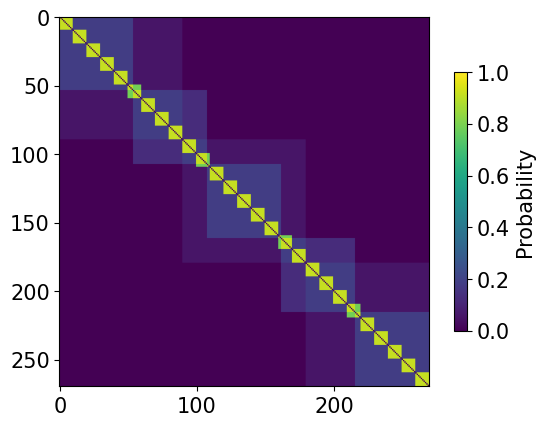

In [4]:
N = 270
n_blocks_nhmsbm_c = 3
n_blocks_nhmsbm_m = 5
n_blocks_nhmsbm_f = 27
p_out = 0.001
nhmsbm_p_in = 0.91278

# define nh-mSBM
nhmsbm = SBM(N, seed=4)
nhmsbm.add_level(n_blocks=n_blocks_nhmsbm_c,p_in=nhmsbm_p_in,p_out=p_out,weight=1)
nhmsbm.add_level(n_blocks=n_blocks_nhmsbm_m,p_in=nhmsbm_p_in,p_out=p_out,weight=2.25)
nhmsbm.add_level(n_blocks=n_blocks_nhmsbm_f,p_in=nhmsbm_p_in,p_out=p_out,weight=13)

print("Expected number of edges:", round(nhmsbm.n_expected_edges,3))
print("Expected sparsity:",round(nhmsbm.expected_sparsity,3))

# plot probability matrix
fig, ax = plt.subplots(1)
im = ax.imshow(nhmsbm.P, vmin=0, vmax=1)
cbar = plt.colorbar(im,shrink=0.7)
cbar.set_label("Probability")

100%|██████████| 200/200 [00:23<00:00,  8.69it/s]


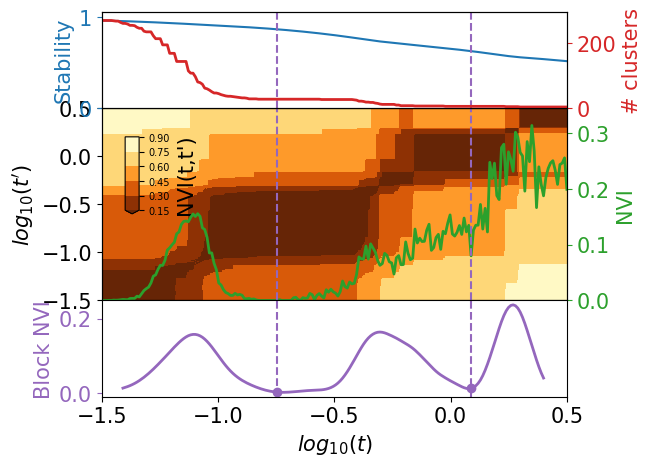

In [6]:
# Set MS parameters
n_scale = 200
min_scale = -1.5
max_scale = 0.5

# Run MS analysis for single sample
A_nhmsbm, permutation_nhmsbm = nhmsbm.sample()
ms_results_nhmsbm = pgs.run(A_nhmsbm,min_scale= min_scale,max_scale= max_scale,n_scale= n_scale,n_workers=4, constructor="continuous_normalized", exp_comp_mode="expm")
pgs.plot_scan(ms_results_nhmsbm)
plt.show()

In [8]:
# get partitions
start_scale_cartoon = 40
partitions = ms_results_nhmsbm["community_id"][start_scale_cartoon:]

# remove duplicates
partitions_cartoon = [partitions[0]]

for i in range(1, len(partitions)):
    if np.array_equal(partitions[i],partitions_cartoon[-1]):
        continue
    else:
        partitions_cartoon.append(partitions[i])

100%|██████████| 43/43 [00:04<00:00,  9.59it/s] 


Average persistent hierarchy: 0.3401


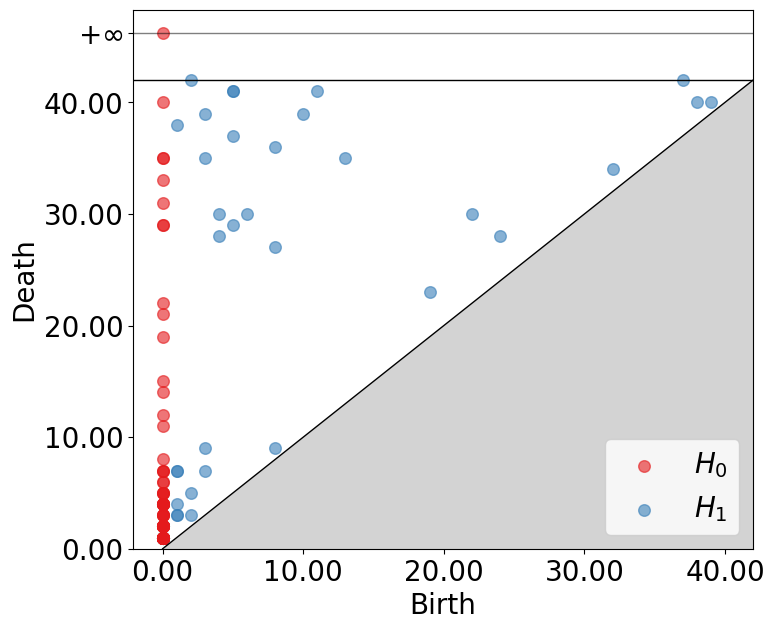

In [12]:
# initialise MCF object for single sequence of partitions
mcf_cartoon = MCF()
mcf_cartoon.load_data(partitions_cartoon,np.arange(len(partitions_cartoon)))

# plot Sankey
fig = mcf_cartoon.plot_sankey(step=1,color=False, pad=1)
fig.write_image("figures/Sankey_nhmSBM-cartoon-bw.svg")

# build filtration and compute PH for single sequence of partitions
mcf_cartoon.build_filtration()
mcf_cartoon.compute_persistence()

# compute persistent hierarchy
h, h_bar = mcf_cartoon.compute_persistent_hierarchy()
print("Average persistent hierarchy:",round(h_bar,4))

# plot persistence diagram
ax = mcf_cartoon.plot_pd(marker_size=70,alpha=0.6)
plt.savefig('figures/nhmsbm_mcf_pd_illustration-cartoon.pdf', bbox_inches='tight')